# Data Analysis Quantitative Cell and Tissue Analysis

In [53]:
%run 'Data Cleaning.ipynb'

## Data Analysis

### Reading Data

In [54]:
filename = 'data.txt'

dirname = os.path.abspath('')
file = os.path.join(dirname, filename)

In [55]:
with open(file, 'r') as f:
    data = pd.read_csv(f, delimiter=' ')
    f.close()
column_samples = data.keys()[1:13]

for i in column_samples:
    data[i] = pd.to_numeric(data[i], errors = 'coerce')
data = data.replace(np.nan, 0, regex = True)

In [56]:
#data

### Analysis of data

In [57]:
#Plotting settings
import matplotlib
matplotlib.rc('text', usetex = True)
matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath, cmbright}", r'\usepackage[OT1]{fontenc}']
plt.rcParams.update({"text.usetex": True, "font.family": "sans-serif", "font.sans-serif": ["Helvetica"]})

In [58]:
#Loading regression logic
%run 'Regression.ipynb'

In [59]:
# defining analyzing function: 
def analyze(x, y, ax, xlabel = '', ylabel = '', title = '', g = lambda x: x, tc = 'red', scatterlabel = 'measurements', m = 'o'):
    '''
    input:
        x, y: arrays with corresponding values
        xlabel, ylabel, title, tc, scatterlabel, m: strings used for plot formation
        g: function used to define linear regression technique
    description:
        analyses input data with an linear regression defined by g and makes plots
    '''
    
    b, a = np.polyfit(g(x), y, 1)
    
    f = lambda x: b*g(x) + a
    z = np.linspace(x.min(), x.max(), 10)
    Y = f(z)

    R2 = 1 - np.sum((y-f(x))**2)/np.sum((y-np.mean(y))**2)
    
    #Scatter
    ax.scatter(x, y, lw = 0.5, c = 'blue', label = scatterlabel, marker = m)
    
    #Trendline
    ax.plot(z, Y, lw = 2, ls = '--', c = tc, label=f'trendline ($R^2$ = {R2:.2f})')
    
    ax.set_xlabel(xlabel, size = 15)
    ax.set_ylabel(ylabel, size = 15)
    
    ax.set_title(title, size=20)

    return a, b

In [60]:
def analyze_2(x, y, xlabel = '', ylabel = ''):
    
    #Linear Regression object
    lr = LinearRegression(x, y)
    
    #Coefficients + function
    a, b = lr.b0, lr.b1
    f = lr.f
    
    z = np.linspace(x.min(), x.max(), 10)
    Y = f(z)
    
    R2 = lr.R**2
    
    lr.RegPlot(alpha = 0.05)

    return a, b

### Part 1: Standard curve for nitrophenol

#### Question 1


q1.1: P0 = 0.017


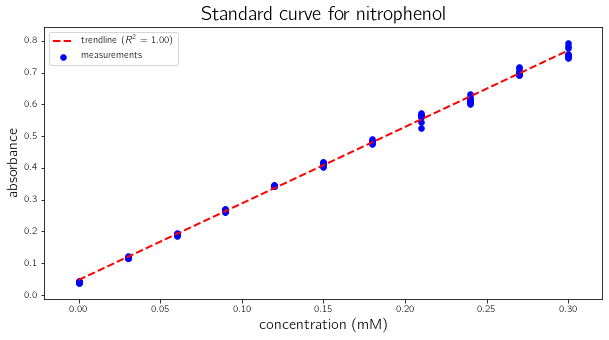

In [89]:
C = data[data['label'] == 'C0'][column_samples[:-1]]
A = data[data['label'] == 'M1'][column_samples[:-1]]

x = C.values.reshape((C.size))
y = A.values.reshape((A.size))

fig, ax = plt.subplots(1, figsize=(10, 5))
a, b = analyze(x, y, ax, 'concentration (mM)', 'absorbance', 'Standard curve for nitrophenol')
plt.legend()
plt.savefig(os.path.join(dirname, 'figures/fig1.png'))

A = data[data['label'] == 'M1'][column_samples[-1]]
P = lambda z: z/b
P0 = np.mean(P(A))
print(f'q1.1: P0 = {P0:.3f}')

In [90]:
C

,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3
1,0.0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3
2,0.0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3
3,0.0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3
4,0.0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3
5,0.0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3
6,0.0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3
7,0.0,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3


### Part 2: Enzymatic activity as a function of substrate concentration

#### Question 1

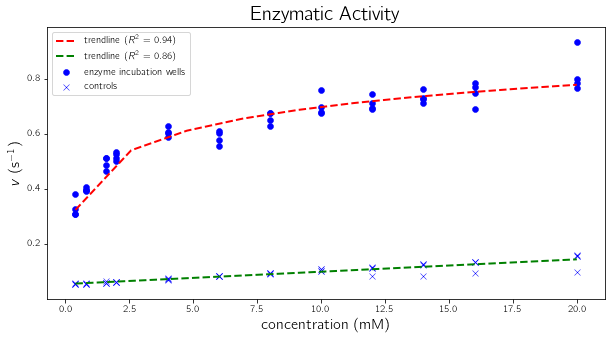

In [91]:
C = np.array([0.4, 0.8, 1.6, 2, 4, 6, 8, 10, 12, 14, 16, 20])
A = data[data['label'] == 'M2'][column_samples]
A_S = A[:4]
A_B = A[4:8]

x = np.zeros(A_S.size)
for i in range(4):
    x[len(C)*i:len(C)*(1+i)] = C

fig, ax = plt.subplots(1, figsize=(10, 5))

y_S = A_S.values.reshape((A_S.size))
a, b = analyze(x, y_S, ax, g = lambda x: np.log(x), scatterlabel= 'enzyme incubation wells')

y_B = A_B.values.reshape((A_B.size))
a, b = analyze(x, y_B, ax, 'concentration (mM)', r'$v$ (s$^{-1}$)', 'Enzymatic Activity', tc = 'green', scatterlabel='controls', m='x')
plt.legend()
#plt.savefig(os.path.join(dirname, 'figures/fig2_1.png'))

#### Questions 2

q2.2: Vmax = 0.000588, Km = 0.51


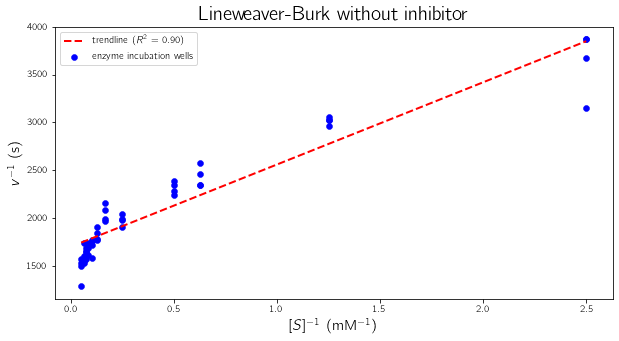

In [92]:
A = data[data['label'] == 'M2'][column_samples]
A_S = A[:4]

s2 = np.zeros(A_S.size)
for i in range(4):
    s2[len(C)*i:len(C)*(1+i)] = C
v2 = A_S.values.reshape((A_S.size))/(1200)

fig, ax = plt.subplots(1, figsize=(10, 5))
a22, b22 = analyze(1/s2, 1/v2, ax, r'$[S]^{-1}$ (mM$^{-1}$)', r'$v^{-1}$ (s)', 'Lineweaver-Burk without inhibitor', scatterlabel='enzyme incubation wells')
plt.legend()
plt.savefig(os.path.join(dirname, 'figures/fig2_2.png'))

Vmax = 1/a22
Km = b22*Vmax
print(f'q2.2: Vmax = {Vmax:.6f}, Km = {Km:.2f}')

#### Question 3

q2.3: Vmax = 0.000604, Km = 0.56


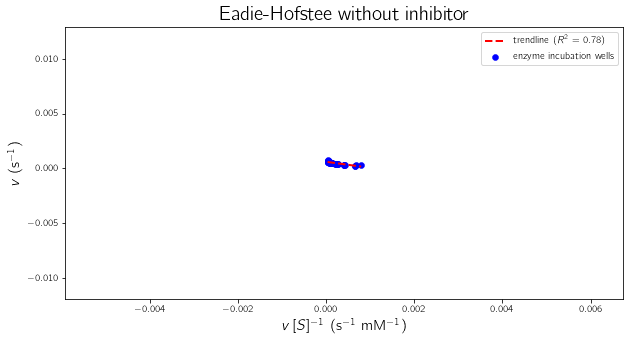

In [93]:
fig, ax = plt.subplots(1, figsize=(10, 5))
a, b = analyze(v2/s2, v2, ax, r'$v\, [S]^{-1}$ (s$^{-1}$ mM$^{-1}$)', r'$v$ (s$^{-1}$)', 'Eadie-Hofstee without inhibitor', scatterlabel='enzyme incubation wells')
plt.legend()
plt.savefig(os.path.join(dirname, 'figures/fig2_3.png'))

Vmax = a
Km = -b
print(f'q2.3: Vmax = {Vmax:.6f}, Km = {Km:.2f}')

#### Question 4

q2.4: Vmax = 0.000681, Km = 1.34


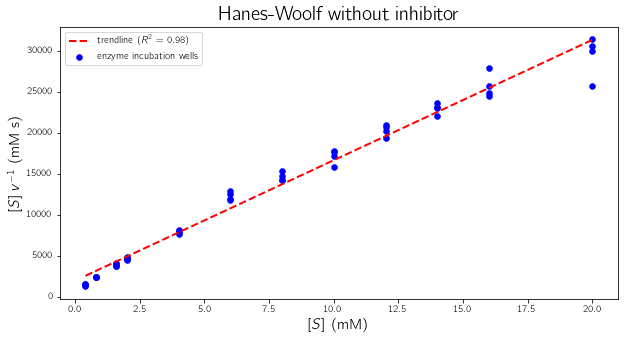

In [94]:
fig, ax = plt.subplots(1, figsize=(10, 5))
a, b = analyze(s2, s2/v2, ax, r'$[S]$ (mM)', r'$[S]\, v^{-1}$ (mM s)', 'Hanes-Woolf without inhibitor', scatterlabel='enzyme incubation wells')
plt.legend()
plt.savefig(os.path.join(dirname, 'figures/fig2_4.png'))

Vmax = 1/b
Km = a*Vmax
print(f'q2.4: Vmax = {Vmax:.6f}, Km = {Km:.2f}')

#### Question 5

q2.4: Vmax = 0.000681, Km = 1.34


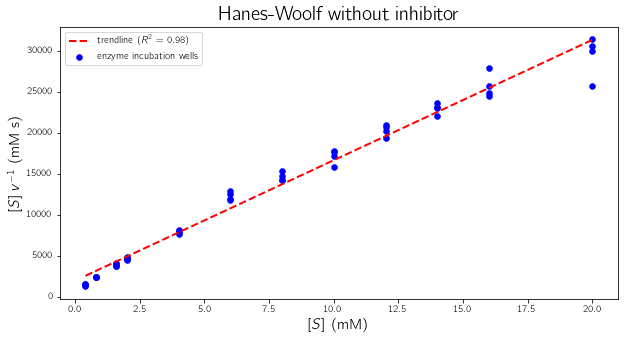

In [95]:
fig, ax = plt.subplots(1, figsize=(10, 5))
a, b = analyze(s2, s2/v2, ax, r'$[S]$ (mM)', r'$[S]\, v^{-1}$ (mM s)', 'Hanes-Woolf without inhibitor', scatterlabel='enzyme incubation wells')
plt.legend()
plt.savefig(os.path.join(dirname, 'figures/fig2_4.png'))

Vmax = 1/b
Km = a*Vmax
print(f'q2.4: Vmax = {Vmax:.6f}, Km = {Km:.2f}')

### Part 3: Enzymatic activity in the presence of an inhibitor

#### Question 1

In [68]:
%run 'Regression.ipynb'

In [69]:
A = np.array(data[data['label'] == 'M3'][column_samples])
A[:, [0, 11]] = A[:, [11, 0]]

A_S = A[0:4]     # with enzym
A_B = A[4:]      # blanks

In [70]:
x = np.zeros(A_S.size)
for i in range(4):
    x[len(C)*i: len(C)*(1+i)] = C

c = np.linspace(x.min(), x.max(), 10)
yA = A_S.reshape((A_S.size))
yB = A_B.reshape((A_B.size))

l2 = LinearRegression(np.log(x), yA)
l3 = LinearRegression(x, yB)

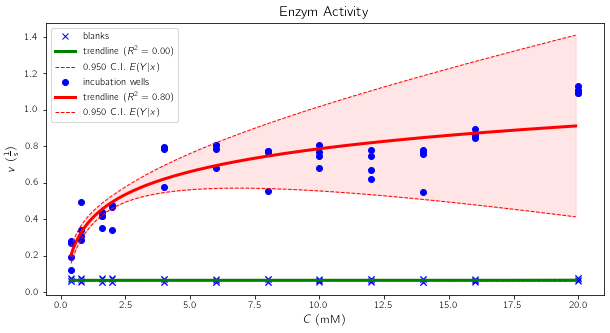

In [71]:
#Figuur

fig, axes = plt.subplots(1, figsize = (10, 5))

l3.RegPlot2(x, g = lambda t: t, color = 'g', mk = 'x', lbk = 'blanks')
l2.RegPlot2(x, g = lambda t: np.log(t), ylabel = r'$v \ (\frac{1}{\mathrm{s}})$', xlabel = '$C$ (mM)', title = 'Enzym Activity', lbk = 'incubation wells')


plt.legend()
plt.show()

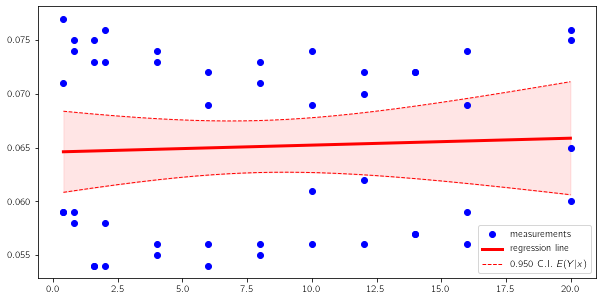

In [72]:
#Regression plot of blanks
l3.RegPlot()

In [73]:
l2.analysis()

Statistics
Type      Mean    Std. err.
------  ------  -----------
x         1.54         1.21
y         0.65         0.25

Coefficients
Coeff      Value  0.950% C.I.    t      p-value
-------  -------  -------------  -----  ---------
b0          0.37  [0.32, 0.42]   \      \
b1          0.18  [0.15, 0.21]   13.48  0.00

Variance-analysis
Source of variation      Sum of Squares    df  Mean Square    f       p-value
---------------------  ----------------  ----  -------------  ------  ---------
Regression                         2.33     1  2.33           181.58  0.00
Error                              0.59    46  0.01
Total                              2.91    47


In [74]:
l3.analysis()

Statistics
Type      Mean    Std. err.
------  ------  -----------
x         7.9          6.26
y         0.07         0.01

Coefficients
Coeff      Value  0.950% C.I.    t     p-value
-------  -------  -------------  ----  ---------
b0          0.06  [0.06, 0.07]   \     \
b1          0     [-0.00, 0.00]  0.34  0.74

Variance-analysis
Source of variation      Sum of Squares    df  Mean Square    f     p-value
---------------------  ----------------  ----  -------------  ----  ---------
Regression                            0     1  0.00           0.11  0.74
Error                                 0    46  0.00
Total                                 0    47


**Answer**

The enzymatic activity of the incubation wells $v_{i}$ is emperically related to the concentration as
$$
v_i(C) = a\ln(C) + b,
$$
where $a = 0.37$ and $b = 0.18$ are determined using linear regression (least square method). By means of analysis of variances we find that our proposed model is significant, since the $p$-value of regression is smaller than our presupposed level of significance $\alpha = 0.05$. 

We presuppose a simple linear regression model for the enzymatic activity of the control wells in relation with the concentration $C$;
$$
v_c(C) = b_0 + b_1\cdot C,
$$
with $b_0 = 0.06$ and $b_1 = 0$. Using analysis of variances, we find that our model is not significant. This implies there is no relation between the enzymatic activity and its concentration. This mathematical conclusion satisfies our predictions.

#### Question 2

In [75]:
C = np.array([0.4, 0.8, 1.6, 2, 4, 6, 8, 10, 12, 14, 16, 20])

A = np.array(data[data['label'] == 'M3'][column_samples])
A[:, [0, 11]] = A[:, [11, 0]]
A_S = A[:4]
A_B = A[4:8]

s3 = np.zeros(A_S.size)

for i in range(4):
    s3[len(C)*i:len(C)*(1+i)] = C
    
v3 = A_S.reshape(A_S.size)/(1200)

l_reg = LinearRegression(1/s3, 1/v3)

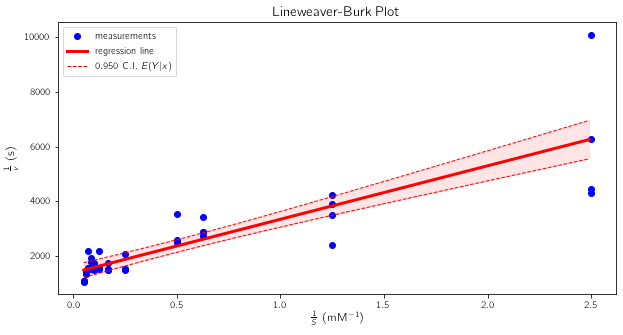

In [76]:
l_reg.RegPlot(title = 'Lineweaver-Burk Plot', ylabel = r'$\frac{1}{v}$ (s)', xlabel = r'$\frac{1}{S}$ (mM$^{-1}$)')

In [77]:
l_reg.analysis()

Statistics
Type       Mean    Std. err.
------  -------  -----------
x          0.48          0.7
y       2336.27       1560.2

Coefficients
Coeff      Value  0.950% C.I.         t      p-value
-------  -------  ------------------  -----  ---------
b0       1395.97  [1117.43, 1674.50]  \      \
b1       1950.86  [1621.60, 2280.11]  11.93  0.00

Variance-analysis
Source of variation      Sum of Squares    df  Mean Square    f       p-value
---------------------  ----------------  ----  -------------  ------  ---------
Regression                  8.82902e+07     1  88290232.89    142.24  0.00
Error                       2.85531e+07    46  620719.41
Total                       1.16843e+08    47


**Answer**

By considering the model 
$$
\frac{1}{v} = a\frac{1}{S} + b,
$$
and applying simple linear regression, we find that $a = 1950.86$ and $b = 1395.97$. Analysis of variances gives that our model is significant.

***
$K_{\mathrm{m}}$ and $V_{\mathrm{max}}$ can be derived from the trendline given by
$$ y(x) = ax + b,$$
and thus
$$V_{\mathrm{max}} = \frac{1}{b}, \quad K_{\mathrm{m}} = \frac{b}{a}$$


In [78]:
Vmax = 1/b
Km = a*Vmax
print(f'q3.2: Vmax = {Vmax:.6f}, Km = {Km:.2f}')

q3.2: Vmax = 0.000681, Km = 1.34


#### Question 3

In [79]:
C = np.array([0.4, 0.8, 1.6, 2, 4, 6, 8, 10, 12, 14, 16, 20])

A = np.array(data[data['label'] == 'M3'][column_samples])
A[:, [0, 11]] = A[:, [11, 0]]
A_S = A[:4]
A_B = A[4:8]

s3 = np.zeros(A_S.size)

for i in range(4):
    s3[len(C)*i:len(C)*(1+i)] = C
    
v3 = A_S.reshape(A_S.size)/(1200)

T = 10**(4)
l_reg2 = LinearRegression(v3/s3*T, v3*T)

In [80]:
l_reg2.f(0.0002)

7.011373311062185

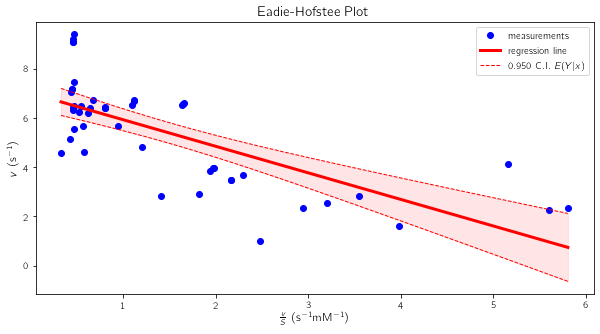

In [81]:
l_reg2.RegPlot(title = 'Eadie-Hofstee Plot', xlabel = r'$\frac{v}{S}$ (s$^{-1}$mM$^{-1}$)', ylabel = '$v$ (s$^{-1})$')

In [82]:
l_reg2.analysis()

Statistics
Type      Mean    Std. err.
------  ------  -----------
x         1.49         1.38
y         5.4          2.05

Coefficients
Coeff      Value  0.950% C.I.     t      p-value
-------  -------  --------------  -----  ---------
b0          7.01  [6.39, 7.63]    \      \
b1         -1.08  [-1.38, -0.77]  -7.13  0.00

Variance-analysis
Source of variation      Sum of Squares    df  Mean Square    f      p-value
---------------------  ----------------  ----  -------------  -----  ---------
Regression                       106.23     1  106.23         50.81  0.00
Error                             96.17    46  2.09
Total                            202.41    47


**Answer**

The model
$$
v = a\frac{v}{S} + b,
$$
analyzed by simple linear regression is significant. The $p$-value is smaller than $\alpha = 0.005$.

q3.3: Vmax = 0.000701, Km = 1.08


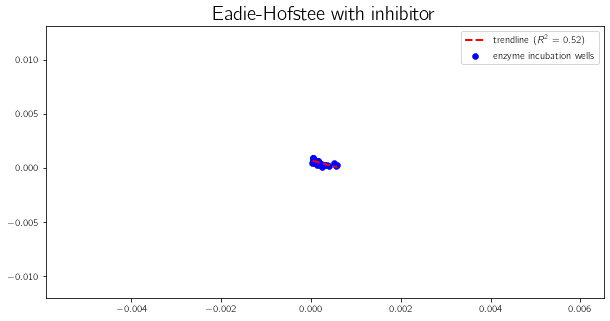

In [86]:
fig, ax = plt.subplots(1, figsize = (10, 5))

a, b = analyze(v3/s3, v3, ax, '', '', "Eadie-Hofstee with inhibitor", scatterlabel = 'enzyme incubation wells')
plt.legend()
#plt.savefig(os.path.join(dirname, 'figures/fig3_3.png'))

Vmax = a
Km = -b
print(f'q3.3: Vmax = {Vmax:.6f}, Km = {Km:.2f}')

#### Question 4

#### Question 5

#### Question 6